/opt/homebrew/anaconda3/lib/python3.9/functools.py:50: RuntimeWarning: coroutine 'make_tts' was never awaited
  for attr in assigned:
/var/folders/bk/zhdff0zs3yz8v31x8wdnftxm0000gn/T/ipykernel_54299/964175003.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2025-08-01")
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker             SPY         SPY         SPY         SPY       SPY
Date                                                                
2020-01-02  299.406403  299.424853  297.249817  298.180662  59151200
2020-01-03  297.139221  298.272823  295.931902  295.987197  77709700
2020-01-06  298.272797  298.355739  295.249859  295.369674  55653900
2020-01-07  297.434174  298.180683  296.982561  297.701423  40496400
2020-01-08  299.019348  300.245089  297.378867  297.627694  68296000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1402 entries, 2020-01-02 to 2025-07-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, SPY)   1402 non-null   float64
 1   (High, SPY)    1402 non-null   float64
 2   (Low, SPY)     1402 non-null   float64
 3   (Open, SPY)    1402 non-null   float64
 4   (Volume, SPY)  1402 non-null   int64  
dtypes: float64(

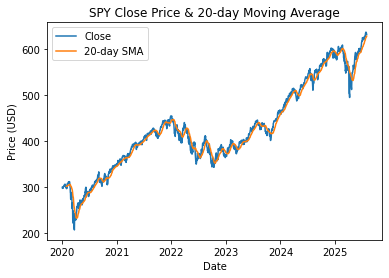

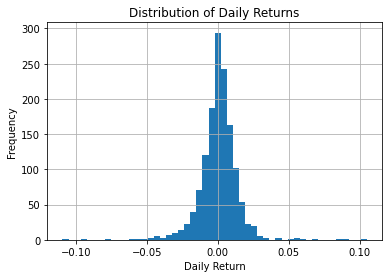

In [35]:
# 1. Install libraries (run once in terminal)
# pip install pandas yfinance matplotlib

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 2. Fetch SPY data via yfinance
ticker = "SPY"
df = yf.download(ticker, start="2020-01-01", end="2025-08-01")
# Alternatively: df = pd.read_csv("SPY.csv", parse_dates=["Date"], index_col="Date")

# 3. Inspect
print(df.head())
print(df.info())
print(df.describe())

# 4. Clean & transform
df = df.sort_index()  # ensure chronological order
df = df.ffill()       # forward-fill missing values
df["Daily Return"] = df["Close"].pct_change()
df["20d SMA"] = df["Close"].rolling(window=20).mean()
df["Cumulative Return"] = (1 + df["Daily Return"]).cumprod() - 1

# 5. Plot: Close vs. 20-day SMA
plt.figure()
plt.plot(df.index, df["Close"], label="Close")
plt.plot(df.index, df["20d SMA"], label="20-day SMA")
plt.title("SPY Close Price & 20-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# 6. Plot: Daily Returns histogram
plt.figure()
df["Daily Return"].hist(bins=50)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# 7. Export cleaned data
#df.to_csv("SPY_cleaned.csv")
# or
#df.to_excel(r"/your_directory/SPY_cleaned.xlsx", sheet_name="SPY Data")



In [36]:
import edge_tts
from pydub import AudioSegment

# Wrap your entire script in SSML <speak> … </speak>,
# inserting <break time="Xs"/> wherever you need a pause.
ssml_text = """

  Good Afternoon Everyone.
  Today I'll walk you through how we can leverage Python to acquire, clean, analyze, and visualize financial time-series data - specifically, S and P 500 ETF Spy prices.

  Let's dive in.

  Agenda
  Here's our roadmap for the next 15 minutes. I'll go over:
  Why I chose Spy data.
  How to set up the environment in VS Code.
  Pulling in and inspecting the data.
  Cleaning and transforming it.
  Performing analysis and creating visuals.
  And lastly exporting results and then we'll wrap things up.
  So feel free to jot down questions; we'll leave time at the end.

  Why Spy?
  Why did I use this dataset? First, it's a household name in finance - everyone gets stock charts.
  Second, it provides multiple fields - Open, High, Low, Close, and Volume - so we can demonstrate several transformations in one dataset.
  Finally, it mirrors real-world workflows: analysts ingest live market data, clean it, calculate indicators, and share insights rapidly.

  Environment Setup
  Think of VS Code like a digital workshop that runs on Windows, or Mac—all your coworkers can use it. It comes with built-in tools to manage your project history and a ‘step-through’ feature that lets you pause your program line by line to look under the hood.
  Now imagine you have a special toolbox for this project only. A virtual environment is that toolbox—it keeps all the parts you need (and only those parts) in one spot.
  Then install our core libraries: First I used Pandas: This is your spreadsheet brain—makes it easy to load, slice, and dice tables of numbers. Next I used yfinance: Think of it as a faucet you turn on to pull in stock prices directly from Yahoo Finance—no manual downloads. Lastly I used Matplotlib: This is our chart-drawing tool—quickly turns columns of numbers into lines and bars so you can actually see what’s happening.

  Data Ingestion
  Now there are multiple ways to acquire data. For this project I used Option A: Automatic pull with yfinance. You don’t have to go download a file by hand each time; your script just reaches out and grabs the latest numbers.
  You can also use Option B: Downloaded CSV file. Sometimes company rules block your script from talking to the internet. In that case, you manually grab a spreadsheet (CSV) from Yahoo Finance ahead of time—like picking up a paper report—and your code reads that instead.
  No matter how the data arrives, pandas.DataFrame is like a supercharged spreadsheet inside Python. It keeps rows and columns neatly organized in memory, so you can sort, filter, and calculate on the fly just like you would in Excel, but with code.

  Data Inspection
  Imagine opening the front cover of a big book and reading the first few pages to make sure it’s the right book and the print looks clear. df head shows you the first handful of rows so you can confirm you have the right columns (like “Date,” “Close,” “Volume”) and that the data looks sensible. Next think of df info like flipping to the table of contents and index to see how many chapters there are, if any pages are missing, and what types of sections you have (text vs. images). df info tells you how many entries each column has (so you catch any blanks), and what kind of data is in them (numbers vs. text). That way you spot any unexpected gaps or formatting issues right away. Lastly, df describe is like glancing at a summary on the back cover: ‘Here’s the average, the highest, the lowest, and the middle values.’ df describe gives you basic stats—average price, the minimum and maximum, and where most values fall—so you can instantly spot oddball numbers (like zero volume days or a price that’s way out of range).

  Cleaning and Transformation
  First, we put our data in time order—like arranging photos by the day they were taken. If you don’t, any calculations that look at “the last 20 days” will get confused, because the days won’t line up correctly. Sometimes the market is closed for a holiday or there’s a missing entry—and that leaves a blank spot in our table. Forward-fill just says, ‘If today’s data is missing, copy yesterday’s data instead.’ It’s like assuming the price stayed the same on days when nobody traded. Next I calculated the key numbers: First, Daily Return: This is how much the price changed from one day to the next, as a percentage. Think of it like checking your step count change day-over-day: it shows how jumpy or calm the market was. Second, 20-day SMA: This is like taking the average of your last 20 days of step counts to see your overall fitness trend—up, down, or flat—so you don’t obsess over each single noisy data point. Lastly, Cumulative Return: Imagine you put $1 in the market on day one. This number tells you how much that dollar would have grown (or shrunk) over time. It gives you the big-picture payoff instead of just daily blips.

  Visualization
  In my script I created two basic charts. First, a Line chart: this is Plot Close vs. 20-day SMA—you’ll see where price crosses its trend line, signaling potential buy/sell points. Second, a Histogram: this is the Daily Return distribution—gauges risk by showing how often big up/down days occur. These visuals can be exported directly or embedded in reports, dashboards, or notebooks. Once you’ve got these pictures, you can save them as image files or put them straight into your slide decks, reports, or online dashboards. No extra work—just copy-and-paste.

  Export and Integration
  With one line df to csv or df to excel —you archive your cleaned data or share with clients. We can optionally wrap our pipeline in a tiny web service using Flask—think of it as a ‘data help desk.’ Instead of emailing Excel files, any tool in your ecosystem just calls a URL and instantly gets back the freshest numbers or charts. It’s fast, automated, and removes the manual hand-offs.

  Conclusion
  This same pipeline pattern scales to any client dataset—logs, inventory, or financial management—you swap in the data source and everything else just works. In my current role I design and deploy data workflows that grab raw inputs, clean them up, and enrich them automatically—architecting end-to-end data flows. We put checks and controls in place so every number we report has an audit trail, and our leadership can rely on it without second-guessing—ensuring data quality and governance. By building ready-made dashboards and exportable datasets, we can empower teams to run their own analyses—speeding up decisions across the board. Once we’ve built the core pipeline, you can plug in new data sources or AI/ML modules without redoing the plumbing—enabling reuse and extensibility.

"""

async def make_tts():
    # Use any neural voice you like
    communicate = edge_tts.Communicate(ssml_text, voice="en-US-RogerNeural")
    await communicate.save("/your_directory/presentation_brief.mp3")

# In Jupyter/IPython you can await directly
await make_tts()

# Speed it up slightly
AudioSegment.converter = "/opt/homebrew/bin/ffmpeg"
AudioSegment.ffprobe   = "/opt/homebrew/bin/ffprobe"

sound  = AudioSegment.from_file("/your_directory/spresentation_brief.mp3")
faster = sound.speedup(playback_speed=1.2)
faster.export("your_directory/spresentation_brief_faster.mp3", format="mp3")


<_io.BufferedRandom name='/Users/Ray/Sig_Work/spy_data/ttspresentation_brief_faster.mp3'>

In [26]:
import asyncio
import edge_tts

async def list_voices():
    voices = await edge_tts.list_voices()
    # print just the voice ID and its locale/friendly name
    for v in voices:
        print(f"{v['ShortName']:<25} {v['Locale']}  —  {v.get('FriendlyName','')}")
        
# in a notebook supporting top-level await, just:
await list_voices()
# otherwise use nest_asyncio or get_event_loop().run_until_complete(...)


af-ZA-AdriNeural          af-ZA  —  Microsoft Adri Online (Natural) - Afrikaans (South Africa)
af-ZA-WillemNeural        af-ZA  —  Microsoft Willem Online (Natural) - Afrikaans (South Africa)
sq-AL-AnilaNeural         sq-AL  —  Microsoft Anila Online (Natural) - Albanian (Albania)
sq-AL-IlirNeural          sq-AL  —  Microsoft Ilir Online (Natural) - Albanian (Albania)
am-ET-AmehaNeural         am-ET  —  Microsoft Ameha Online (Natural) - Amharic (Ethiopia)
am-ET-MekdesNeural        am-ET  —  Microsoft Mekdes Online (Natural) - Amharic (Ethiopia)
ar-DZ-AminaNeural         ar-DZ  —  Microsoft Amina Online (Natural) - Arabic (Algeria)
ar-DZ-IsmaelNeural        ar-DZ  —  Microsoft Ismael Online (Natural) - Arabic (Algeria)
ar-BH-AliNeural           ar-BH  —  Microsoft Ali Online (Natural) - Arabic (Bahrain)
ar-BH-LailaNeural         ar-BH  —  Microsoft Laila Online (Natural) - Arabic (Bahrain)
ar-EG-SalmaNeural         ar-EG  —  Microsoft Salma Online (Natural) - Arabic (Egypt)
ar-EG-Shaki